<a href="https://colab.research.google.com/github/Ammar-bin-Akram/HTR2Text/blob/main/DeepLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -V

Python 3.11.12


In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("All imports successful!")
print(f"Device: {'CPU' if not torch.cuda.is_available() else 'GPU'}")

All imports successful!
Device: GPU


In [39]:
# setting the seeds
np.random.seed(42)

In [3]:
!pip install dropbox -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.1/572.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 12.1 MB/s eta 0:00:00


In [4]:
import dropbox

In [9]:
# connecting dropbox to colab
ACCESS_TOKEN = 'sl.u.AFuhPgyPqrL63IInKrLEDCnPVvo_J-WMTqm9GOgFBaw4zFuM9JWbR3hmqGgqIxF1jYJkn9yEQAJMbH94IxzKZn-P30See1RY6xW5Utq_exY3H7VpNPObxSE7EhSrTt_Ji4c8Hgjql-ACXkKq3UJMYCYdtu3M43c91Rn1cnui63xOBYs_gY4hHrQvUEK-I176sV6oMVmGrswgt3JAcmh67_jnlpFK_VNqB0PBeq0O2uHyveYNwtLRyJZkFgOBTwNWxHCKT-2mI4BhogKR6cuwGenVbCYU0U5tgFC_wYniAPdOn6XIQ5STPhWzVoQbVa-KDTaJRL22dVQs0w-d1P_bDrzAkhynkyApVOSvyylUwWKzShVcqTXt88ji_jDAqFYC_1AIF8c9W2LXIWyiQMmtv-s_mFkUf1jlsS5XdH5dce0s4RuSwUmAo4jwqfy5yvmLh4co8_UCJxR3iyXyzC4uO0SGEn0SXpVQdhv-JWf11TQsrqdOav0FpTehF3njuOgvqBu5Jt-xXpthf5jb_KXGU-J43dQ7dLd7CCt0r_8FJTFe27c6Exe8slntwBDq87afSo17z83jLTrESmTPFEW9qDO6BO9sZ-dq4R-gPWFnt3Gv8-gDPp-OvWz7Abpi1vdLNhUbthGiRdCXKSYRoY_KiwciUtGuuRhddli46YTYFGpmRQo2ejcIBWKum0de0JI_bLrxaSHIBSGlaH4D0hajfcv534pS6caBFplkHlCDMpJIDCwpdTl0DjD5SnLCiVGK2xgIHiarxbXtMvfzrRO2TsYmpwb5WDBKHOc13HH_K92mQ0urm02Wyb_JtCqlDW1N-YvoKJMpMUZjF6aA5ttfid0AVGrgJQ7NEPHJVkBwrJJXIR2zeeRI8CR9EXoJ4rjIkF7Yyw24xmOPxHXFzGHqHnZm0Fc9L6gxuVZ5AnHaog-FxvlIeVUGqALAiyIOmMr3ktYr5eP9LapE1PMQw2BRYBqrcBkgdWMVCKipWxDZL5U92gQoXRgHsnNxH0mYhmbEUqqreqwOftRZtMwXdJvW8xsp2n04JMqPHvAzarL6_DZQoKmhwAJ76CYYlRMh9QmAOvQP8dB1_csT8naAYWezjjJFrSnkyi9GHRgI5RIZi7JAHBAhTVTLucD7tCPOrJdpRDd28ppRoDuMJgVKsyT1xlWMCzpO5jnRGrHhc0essCDIL8dsBtJlDxej4SeyVSNVtp2gC5nPv6kzch6yKr7IKfUY0w2qfxF_mBybGgzYVg0XObGABuOM_5Gf77NWbEd3eddbaZ0wIeUtgjBwYy6W83fj8IJkmC8bOCctsLD6E13i2xF68W-xOXXntyoPlmfV8Lu2ZldDsI5r2vvNGuLSZ7dcsiw9wSazs8foB64ffFI9-HmrsdQoSP7fkhlnvduSQJwdSQQDxzE-FjtpoFfnva1X'
dbx = dropbox.Dropbox(ACCESS_TOKEN)

In [10]:
try:
  dbx.files_list_folder('')
  print('Connection successfull!')
except dropbox.exceptions.AuthError:
  print('Authentication unsuccessful!')
except Exception as e:
  print(f'{e}')

Connect/ion successfull!


## Importing the Dataset

In [11]:
for entry in dbx.files_list_folder('').entries:
    print(entry.path_display)

/Project Files


In [12]:
dataset_path = '/Project Files/data.zip'
download_path = '/content/IAM_dataset.zip'

metadata, res = dbx.files_download(path=dataset_path)

# Save to local file
with open(download_path, 'wb') as f:
    f.write(res.content)

print("Downloaded successfully!")

Downloaded successfully!


In [13]:
!unzip /content/IAM_dataset.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/validation_v2/validation/VALIDATION_5003.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5004.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5005.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5006.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5007.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5008.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5009.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5010.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5011.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5012.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5013.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATION_5014.jpg  
  inflating: /content/data/validation_v2/validation/VALIDATIO

## Preprocessing the data

In [14]:
train_dir = '/content/data/train_v2/train'
files = os.listdir(train_dir)
print(len(files))

330961


In [15]:
# checking for number of rows in train.csv
train_df = pd.read_csv('/content/data/written_name_train_v2.csv')
train_df.shape

(330961, 2)

In [16]:
test_dir = '/content/data/test_v2/test'
files = os.listdir(test_dir)
print(len(files))

41370


In [17]:
test_df = pd.read_csv('/content/data/written_name_test_v2.csv')
test_df.shape

(41370, 2)

In [18]:
val_dir = '/content/data/validation_v2/validation'
files = os.listdir(val_dir)
print(len(files))

41370


In [19]:
val_df = pd.read_csv('/content/data/written_name_validation_v2.csv')
val_df.shape

(41370, 2)

In [20]:
train_df.columns

Index(['FILENAME', 'IDENTITY'], dtype='object')

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [22]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


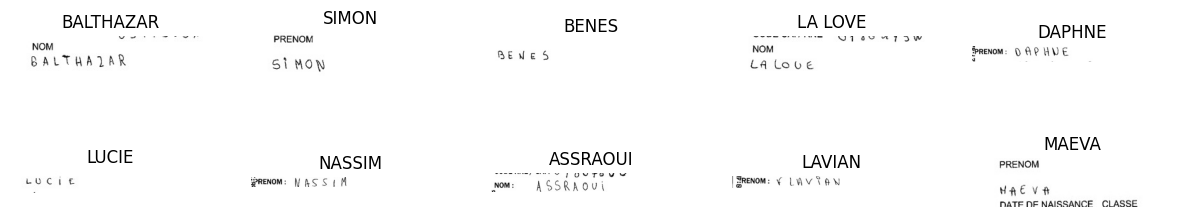

In [23]:
# plotting some images in the train data
plt.figure(figsize=(15, 10))

for i in range(10):
  plt.subplot(2, 5, i+1)
  img_dir = '/content/data/train_v2/train/' + train_df.loc[i, 'FILENAME']

  img = cv2.imread(img_dir)
  plt.imshow(img, cmap = 'gray')
  plt.title(train_df.loc[i, 'IDENTITY'], fontsize=12)
  plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [24]:
# checking for null in the data
print('Null in training data: ', train_df['IDENTITY'].isnull().sum())
print('Null in test data: ', test_df['IDENTITY'].isnull().sum())
print('Null in validation data: ', val_df['IDENTITY'].isnull().sum())

Null in training data:  565
Null in test data:  70
Null in validation data:  78


In [25]:
null_df = train_df[train_df['IDENTITY'].isnull()]
null_df.reset_index(inplace=True, drop=True)
null_df.head()

,FILENAME,IDENTITY
0,TRAIN_01914.jpg,NaN
1,TRAIN_02130.jpg,NaN
2,TRAIN_02625.jpg,NaN
3,TRAIN_04629.jpg,NaN
4,TRAIN_04873.jpg,NaN


In [26]:
# dropping null values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
val_df.dropna(inplace=True)

In [27]:
# it shows there are some unreadable images in our data
uni_values = train_df['IDENTITY'].unique()
if 'UNREADABLE' in uni_values:
  print(True)
else:
  print(False)

True


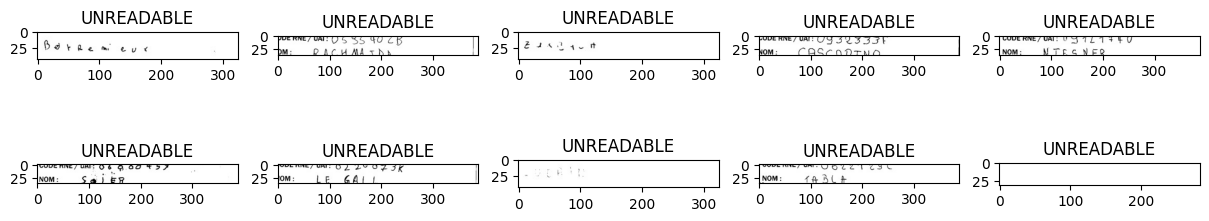

In [28]:
# unreadable images
unreadable_df = train_df[train_df['IDENTITY'] == 'UNREADABLE']
unreadable_df.reset_index(inplace = True, drop=True)
plt.figure(figsize=(15, 10))

for i in range(10):
  plt.subplot(2, 5, i+1)
  img_dir = '/content/data/train_v2/train/' + unreadable_df.loc[i, 'FILENAME']

  img = cv2.imread(img_dir)
  plt.imshow(img, cmap = 'gray')
  plt.title('UNREADABLE')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [29]:
# removing the unreadable images
train_df = train_df[train_df['IDENTITY'] != 'UNREADABLE']
val_df = val_df[val_df['IDENTITY'] != 'UNREADABLE']

In [30]:
# converting the lower case labels to uppeercase
train_df['IDENTITY'] = train_df['IDENTITY'].str.upper()
val_df['IDENTITY'] = val_df['IDENTITY'].str.upper()

In [31]:
train_df.reset_index(inplace = True, drop=True)
val_df.reset_index(inplace = True, drop=True)

## Preprocessing Images for training

In [55]:
# checking if all images are of same dimensions
train_data = '/content/data/train_v2/train'
files = os.listdir(train_data)

In [56]:
print(files[:5])

['TRAIN_26726.jpg', 'TRAIN_220253.jpg', 'TRAIN_96771.jpg', 'TRAIN_264518.jpg', 'TRAIN_67628.jpg']


In [57]:
for image in files[:5]:
  img_path = os.path.join(train_data, image)
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  print(img.shape)

(44, 324)
(44, 324)
(44, 324)
(44, 324)
(27, 388)


In [124]:
val_data = '/content/data/validation_v2/validation'
val_files = os.listdir(val_data)
print(val_files[:5])

['VALIDATION_39281.jpg', 'VALIDATION_39487.jpg', 'VALIDATION_18195.jpg', 'VALIDATION_11548.jpg', 'VALIDATION_17591.jpg']


##### We can see that the dimensions of the images are not the same

In [35]:
def preprocess_image(img_path, target_width=128, target_height=32):
    # Step 1: Read the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # <- Correct way to read as grayscale directly

    if img is None:
        raise ValueError(f"Image not found at {img_path}")

    # Step 2: Threshold to get binary image
    _, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 3: Find contours (i.e., the text regions)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Find bounding box of all contours
    if len(contours) > 0:
        x, y, w, h = cv2.boundingRect(np.vstack(contours))
        img_cropped = img[y:y+h, x:x+w]
    else:
        img_cropped = img  # fallback if no contours found

    # Step 5: Resize while maintaining aspect ratio
    h, w = img_cropped.shape
    aspect_ratio = w / h

    if aspect_ratio > target_width / target_height:
        new_w = target_width
        new_h = int(target_width / aspect_ratio)
    else:
        new_h = target_height
        new_w = int(target_height * aspect_ratio)

    img_resized = cv2.resize(img_cropped, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Step 6: Pad the resized image to the final size
    pad_width = target_width - new_w
    pad_height = target_height - new_h

    top = pad_height // 2
    bottom = pad_height - top
    left = pad_width // 2
    right = pad_width - left

    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)

    # Step 7: Normalize pixel values between 0 and 1
    img_normalized = img_padded.astype(np.float32) / 255.0

    return img_normalized


In [36]:
train_df.shape

(330294, 2)

#### Using train_df, val_df to ensure images and labels are loaded in the correct order to the model

In [37]:
# extracting the required images from the train_df because it contains only required images
train_images = train_df['FILENAME'].values
print(len(train_images))
print(train_images[:5])
for image in train_images:
  print(image)
  break

330294
['TRAIN_00001.jpg' 'TRAIN_00002.jpg' 'TRAIN_00003.jpg' 'TRAIN_00004.jpg'
 'TRAIN_00005.jpg']
TRAIN_00001.jpg


In [108]:
# extracting the required images from the val_df because it contains only required images
val_images = val_df['FILENAME'].values
print(len(val_images))
print(val_images[:5])
for image in val_images:
  print(image)
  break

41280
['VALIDATION_0001.jpg' 'VALIDATION_0002.jpg' 'VALIDATION_0003.jpg'
 'VALIDATION_0004.jpg' 'VALIDATION_0005.jpg']
VALIDATION_0001.jpg


In [109]:
os.makedirs('/content/processed_train_data', exist_ok=True)
os.makedirs('/content/processed_validation_data', exist_ok=True)

In [42]:
# applying preprocessing on all images from train_df
save_dir = '/content/processed_train_data'
for image in train_images:
  image_path = os.path.join(train_data, image)
  standard_image = preprocess_image(image_path)
  save_path = os.path.join(save_dir, image)
  cv2.imwrite(save_path, (standard_image * 255).astype(np.uint8))

print('All images are saved!')

All images are saved!


In [125]:
# applying preprocessing on all images from val_df
save_dir = '/content/processed_validation_data'
for image in val_images:
  image_path = os.path.join(val_data, image)
  standard_image = preprocess_image(image_path)
  save_path = os.path.join(save_dir, image)
  cv2.imwrite(save_path, (standard_image * 255).astype(np.uint8))

print('All images saved!')

All images saved!


In [126]:
train_data_dir = '/content/processed_train_data/'
validation_dir_data = '/content/processed_validation_data/'

In [127]:
# fucntion to get the image_paths and image_labels
def get_image_paths_and_labels(data_dir, df):
  image_paths = []
  image_labels = []
  for index, row in df.iterrows():
    image_path = os.path.join(data_dir, row['FILENAME'])
    image_paths.append(image_path)
    image_labels.append(row['IDENTITY'])
  return image_paths, image_labels

In [128]:
train_image_paths, train_y = get_image_paths_and_labels(train_data_dir, train_df)

In [129]:
val_image_paths, val_y = get_image_paths_and_labels(validation_dir_data, val_df)

In [130]:
print(len(train_image_paths))
print(len(train_y))

330294
330294


In [131]:
print(len(val_image_paths))
print(len(val_y))

41280
41280


In [132]:
print(train_image_paths[:5])

['/content/processed_train_data/TRAIN_00001.jpg', '/content/processed_train_data/TRAIN_00002.jpg', '/content/processed_train_data/TRAIN_00003.jpg', '/content/processed_train_data/TRAIN_00004.jpg', '/content/processed_train_data/TRAIN_00005.jpg']


In [133]:
print(train_y[:5])

['BALTHAZAR', 'SIMON', 'BENES', 'LA LOVE', 'DAPHNE']


In [134]:
print(val_image_paths[:5])

['/content/processed_validation_data/VALIDATION_0001.jpg', '/content/processed_validation_data/VALIDATION_0002.jpg', '/content/processed_validation_data/VALIDATION_0003.jpg', '/content/processed_validation_data/VALIDATION_0004.jpg', '/content/processed_validation_data/VALIDATION_0005.jpg']


In [135]:
print(val_y[:5])

['BILEL', 'LAUMIONIER', 'LEA', 'JEAN-ROCH', 'RUPP']


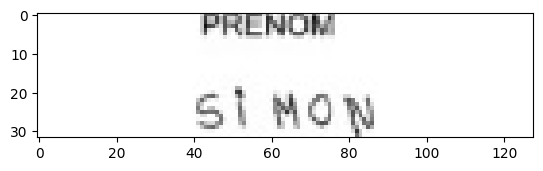

In [137]:
image = cv2.imread('/content/processed_train_data/TRAIN_00002.jpg')
plt.imshow(image, cmap='gray')
plt.show()

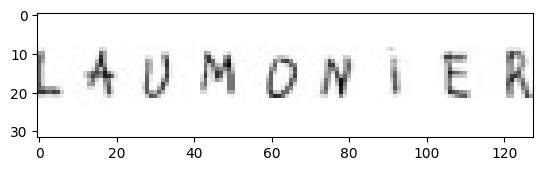

In [140]:
image = cv2.imread('/content/processed_validation_data/VALIDATION_0002.jpg')
plt.imshow(image, cmap='gray')
plt.show()

In [141]:
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ-'` "

# Create mappings
char_to_num = {char: idx for idx, char in enumerate(characters)}
num_to_char = {idx: char for idx, char in enumerate(characters)}


In [142]:
char = 'A'
print(char_to_num[char])
number = 23
print(num_to_char[number])

0
X


In [143]:
# encoding strings into numbers
y_train = []
for label in train_y:
    encoded_label = [char_to_num[char] for char in label]
    y_train.append(encoded_label)

y_val = []
for label in val_y:
    encoded_label = [char_to_num[char] for char in label]
    y_val.append(encoded_label)


In [144]:
y_train[:5]

[[1, 0, 11, 19, 7, 0, 25, 0, 17],
 [18, 8, 12, 14, 13],
 [1, 4, 13, 4, 18],
 [11, 0, 29, 11, 14, 21, 4],
 [3, 0, 15, 7, 13, 4]]

In [145]:
# padding the labels to get all labels of same length
max_label_length = max(len(label) for label in y_train + y_val)

y_train = pad_sequences(y_train, maxlen=max_label_length, padding='post', value=0)
y_val = pad_sequences(y_val, maxlen=max_label_length, padding='post', value=0)


In [146]:
print(len(train_image_paths))
print(len(y_train))

330294
330294


In [147]:
print(train_image_paths[:5])

['/content/processed_train_data/TRAIN_00001.jpg', '/content/processed_train_data/TRAIN_00002.jpg', '/content/processed_train_data/TRAIN_00003.jpg', '/content/processed_train_data/TRAIN_00004.jpg', '/content/processed_train_data/TRAIN_00005.jpg']


In [148]:
print(train_y[:5])

['BALTHAZAR', 'SIMON', 'BENES', 'LA LOVE', 'DAPHNE']


In [ ]:
# creating datasets
# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

# Validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, y_val))
val_dataset = val_dataset.batch(64).prefetch(tf.data.AUTOTUNE)


ValueError: Dimensions 330296 and 330294 are not compatible

In [ ]:
train_x = np.array(train_x, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)

In [ ]:
X_train_tensor = tf.convert_to_tensor(train_x, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)

X_val_tensor = tf.convert_to_tensor(val_x, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.int32)

# Create tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))

# Batch and shuffle
batch_size = 64

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
# building the model CRNN
img_height = 32
img_width = 128
channels = 1  # grayscale images

# Define number of output classes
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ-'` "
num_classes = len(characters) + 1  # +1 for CTC 'blank' label

# Inputs
inputs = keras.Input(shape=(img_height, img_width, channels), name='image_input')

# --- CNN Part (Feature Extraction) ---
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)   # output size: (H/2, W/2)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)   # output size: (H/4, W/4)

# --- Reshape for RNN Part ---
# Flatten the feature maps across height
new_shape = (img_width // 4, (img_height // 4) * 128)  # (time_steps, features)
x = layers.Reshape(target_shape=new_shape)(x)

# --- RNN Part (Sequence Modeling) ---
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)

# --- Output layer ---
x = layers.Dense(num_classes, activation='softmax')(x)

# Final model
model = keras.models.Model(inputs=inputs, outputs=x)

# Show the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 32, 128, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 128, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 32, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 32, 256)        │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32, 31)         │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,375 (6.32 MB)

 Trainable params: 1,657,375 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# defining the CTC loss
# Inputs to the model
labels = keras.layers.Input(name='label', shape=(None,), dtype='float32')
input_length = keras.layers.Input(name='input_length', shape=(1,), dtype='int64')
label_length = keras.layers.Input(name='label_length', shape=(1,), dtype='int64')

# The output of the CRNN base model
y_pred = model.output  # shape: (batch_size, time_steps, num_classes)

# CTC Loss Layer
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

# Wrap it into a Keras Lambda layer
loss_out = layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])

# Full CTC model
ctc_model = keras.models.Model(
    inputs=[model.input, labels, input_length, label_length],
    outputs=loss_out
)

In [ ]:
batch_size = 64
img_width = 128  # replace with your actual width
downsample_factor = 4  # usually CNN downsamples by 4x (2x2 pooling twice)

# Input length is same for all images after CNN
input_length = img_width // downsample_factor

# Now create arrays for input_length and label_length
train_input_lengths = np.full((len(train_x), 1), input_length, dtype=np.int32)
train_label_lengths = np.array([[len(label)] for label in train_y], dtype=np.int32)

val_input_lengths = np.full((len(val_x), 1), input_length, dtype=np.int32)
val_label_lengths = np.array([[len(label)] for label in val_y], dtype=np.int32)


# ----------